# Problem Statement



https://www.kaggle.com/uciml/pima-indians-diabetes-database

#### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

#### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

#### Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# Q1. Load the data 


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
data = pd.read_csv("pima-indians-diabetes.csv")


# Q2. Print 10 samples from the dataset

In [2]:
data.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Explore data types and check data shape 

In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

###### Note: There are '0's in the data. Are they really valid '0's or they are missing values?
##### Plasma, BP, skin thickness etc. these values cannot be 0. look at column by column logically to understand this.


# Q4 Replace all the invalid 0s in the column ( based on your understanding of the data) with the median of the same column value accordingly.

In [27]:
for col in ['Plas','Pres','skin','test','mass']:
    median = data[col].median()
    data[col]=data[col].replace(0,median)

# Q5 Do the descriptive statistics of the data

In [30]:
data.describe()


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 Perform EDA on the Dataset and check Class column

In [31]:
# The mean calculation
data.groupby('class').mean()

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,3.298000,110.682000,70.920000,26.058000,83.188000,30.880200,0.429734,31.190000
1,4.865672,142.130597,75.123134,29.716418,116.041045,35.381343,0.550500,37.067164


In [33]:
# The median calculation
data.groupby('class').median()

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,2.0,107.5,72.0,23.0,39.0,30.40,0.336,27.0
1,4.0,140.0,74.0,27.0,30.5,34.25,0.449,36.0


# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


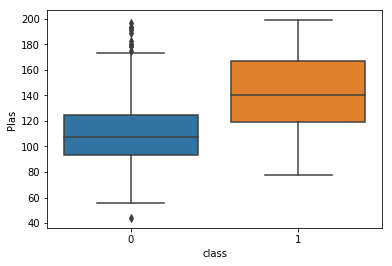

In [37]:
# plot plas vs class
sns.boxplot(y='Plas', x='class',  data=data)

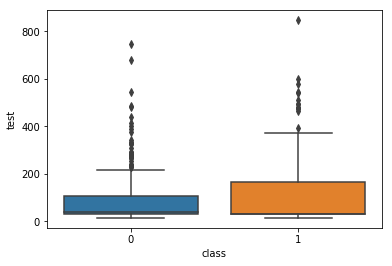

In [38]:
# plot test vs class
sns.boxplot(y='test', x='class',  data=data)

Text(0.5, 1.0, 'Correlation between different features of dataset\n')

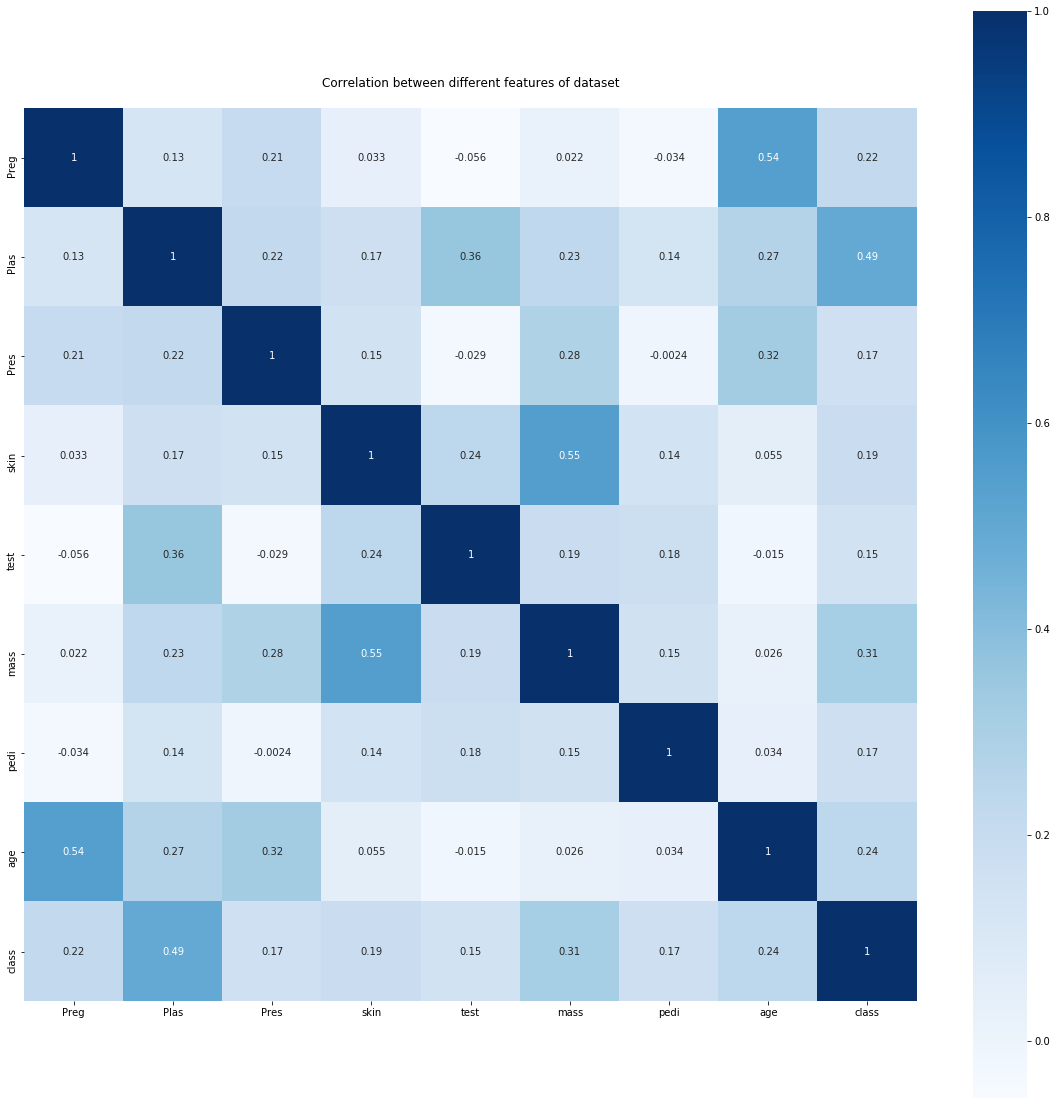

In [39]:
#Correlation matrix
correlation = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='Blues')
plt.title('Correlation between different features of dataset\n')

Using the plot - infer the relationship between different variables

# Q8 Split data into training and test set in the ratio of 70:30 (Training:Test)


In [41]:
# Splitting 70% of the records from the dataset for training and 30% for testing 
from sklearn.model_selection import train_test_split
X = data.drop(['class'], axis =1 )
Y = data['class']
X_train , X_test , Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

# Q9 Perfrom different ML Models and compareresult from all the models

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
sc =StandardScaler()
lr = LogisticRegression()
lr.fit(X_train,Y_train)
print("Train Accuracy")
print(lr.score(X_train,Y_train))
print("Test Accuracy")
print(lr.score(X_test,Y_test))


Train Accuracy
0.770949720670391
Test Accuracy
0.7748917748917749


C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors= 4)
kn.fit(X_train,Y_train)
print("Train Accuracy")
print(kn.score(X_train,Y_train))
print("Test Accuracy")
print(kn.score(X_test,Y_test))

Train Accuracy
0.7988826815642458
Test Accuracy
0.7532467532467533


In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
print("Train Accuracy")
print(kn.score(X_train,Y_train))
print("Test Accuracy")
print(kn.score(X_test,Y_test))

Train Accuracy
0.7988826815642458
Test Accuracy
0.7532467532467533


In [52]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,Y_train)
print("Train Accuracy")
print(svm.score(X_train,Y_train))
print("Test Accuracy")
print(svm.score(X_test,Y_test))

Train Accuracy
1.0
Test Accuracy
0.6623376623376623


C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, Y_train)
print("Train Accuracy")
print(gnb_clf.score(X_train,Y_train))
print("Test Accuracy")
print(gnb_clf.score(X_test,Y_test))

Train Accuracy
0.7467411545623837
Test Accuracy
0.7619047619047619


# Q10 Evaluate model using different metrices


Logistic Regression model accuracy score =  0.7748917748917749

Test labels, Predicted labels


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

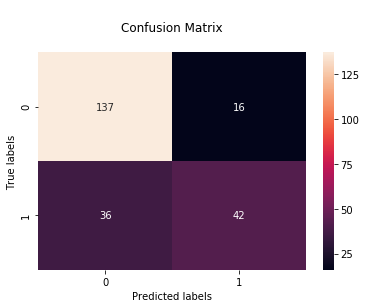

In [56]:
accuracy1 = logit_model.score(X_test, Y_test)
Y_predicted1 = logit_model.predict(X_test)
print('\nLogistic Regression model accuracy score = ', accuracy1)
print('\nTest labels, Predicted labels')
y_grid1 = (np.column_stack([Y_test, Y_predicted1]))
#print(y_grid1)

cm = metrics.confusion_matrix(Y_test, Y_predicted1)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


KNN Model accuracy =  0.7532467532467533

Test labels, Predicted labels


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

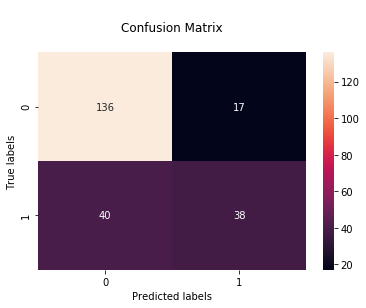

In [61]:
accuracy3 = kn.score(X_test, Y_test)
Y_predicted3 = kn.predict(X_test)
print('\nKNN Model accuracy = ', accuracy3)
print('\nTest labels, Predicted labels')
y_grid3 = (np.column_stack([Y_test, Y_predicted3]))
#print(y_grid3)


cm = metrics.confusion_matrix(Y_test, Y_predicted3)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])



Decision Tree Model accuracy =  0.7186147186147186

Test labels, Predicted labels


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

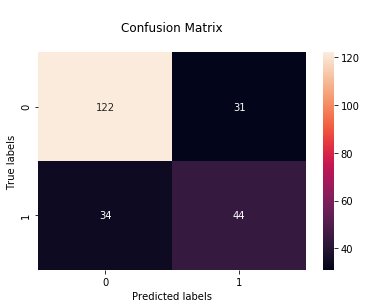

In [64]:
accuracy7 = dt.score(X_test , Y_test)
Y_predicted7 = dt.predict(X_test)
print('\nDecision Tree Model accuracy = ', accuracy7)
print('\nTest labels, Predicted labels')
y_grid7 = (np.column_stack([Y_test, Y_predicted7]))
#print(y_grid7)


cm = metrics.confusion_matrix(Y_test, Y_predicted7)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

Logistic Regression is the best model as it have accuracy score =  0.7748917748917749 which is more any other model.

